# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Objectives

*   Exploratory Data Analysis
*   Preparing Data Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


Load 'dataset_part_2.csv'


In [2]:
df=pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Analyzing the effect of the Payload Mass and Flight Number

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.


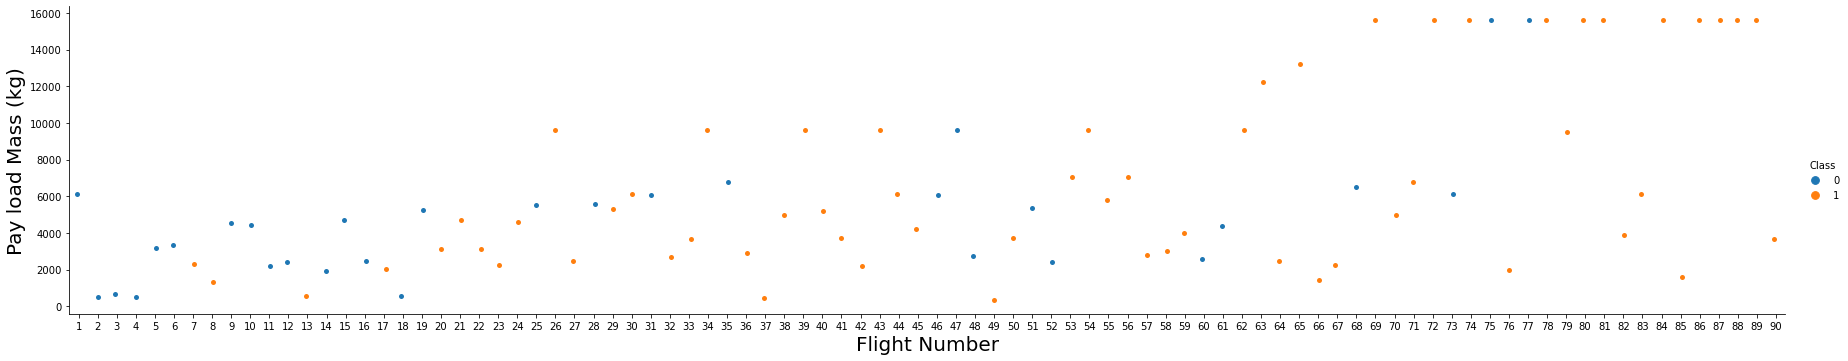

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We can plot out the <code>PayloadMass</code> vs <code>FlightNumber</code> and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully (Class = 1). The payload mass is also important; it seems that there are more successful launches when the payload mass is larger.

### Analyzing the relationship between Flight Number and Launch Site


Next, let us try to observe the trend in <code>LaunchSite</code> with respect to the <code>FlightNumber</code>.

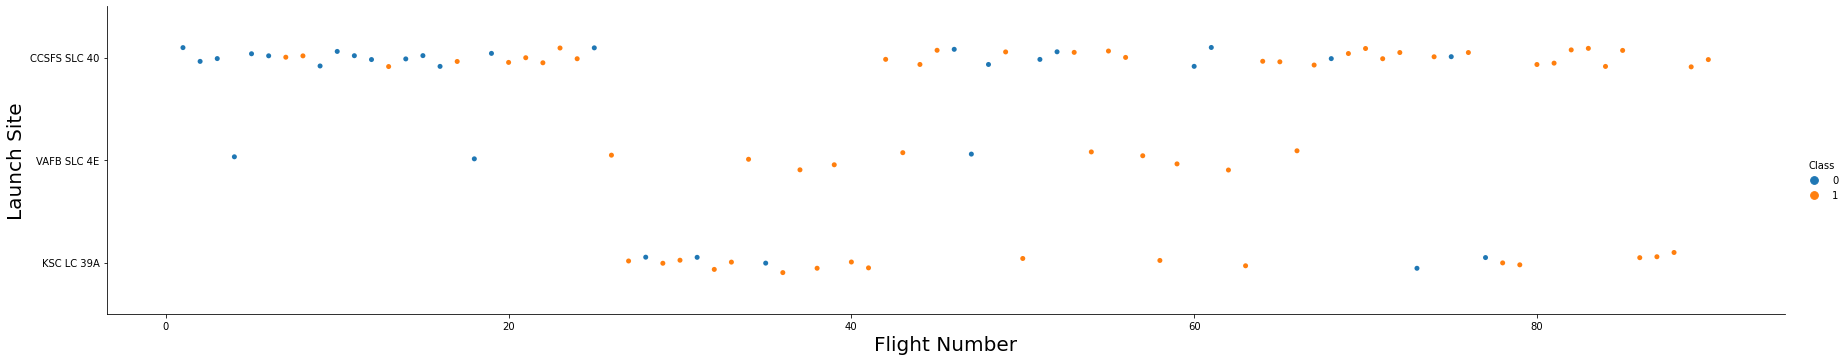

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that in the earlier flights, most of the launches are on <code> CCSFS SLC 40 </code> and it is observable that most of the launches failed (Class = 0). Moreover, we can observe that as the flight number progresses, other launch sites like <code> VAFB SLC 4E </code> and <code> KSC LC 39A </code> were used. Also, the success rates of the flights seem to improve.

In [5]:
df.groupby('LaunchSite')['Class'].mean()

LaunchSite
CCSFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### Analyzing the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


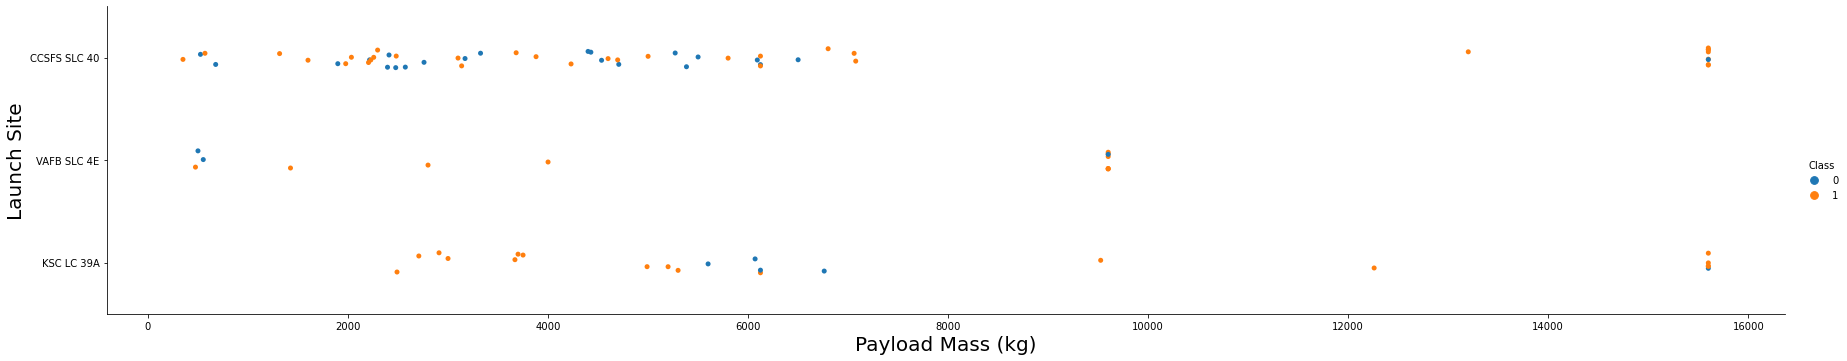

In [6]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can observe that for the VAFB-SLC launchsite, there are no  rockets  launched for  heavypayload mass(greater than 10000).


### Visualizing the relationship between success rate of each orbit type


The success rate of each orbit can no be visualized by using a `bar chart`.

<AxesSubplot:xlabel='Orbit'>

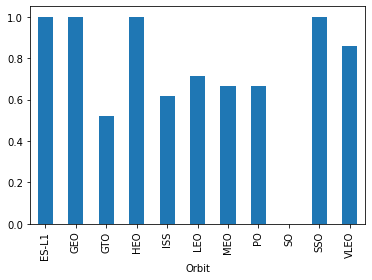

In [7]:
df.groupby('Orbit')['Class'].mean().plot.bar()

We can observe here that the most successful orbits are <code>ES-L1</code>, <code>GEO</code>, <code>HEO</code>, <code>SSO</code> and <code>VELO</code>. It can also be observed that the success rate of <code>SO</code> is 0%.

### Visualizing the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


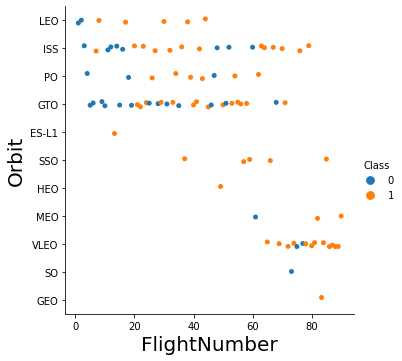

In [8]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We can observe that in the LEO orbit the success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualizing the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


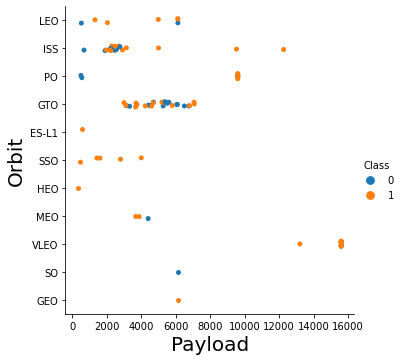

In [9]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for <code> PO </code>, <code> VLEO </code> and <code> ISS </code>.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Visualizing the launch success yearly trend


Here, we can analyze the average of the success rate per year to see the trend of rockethip launches through the years.


To help in the extraction, we can create a function which parses the year number in the date variable.

In [10]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

<AxesSubplot:xlabel='Date'>

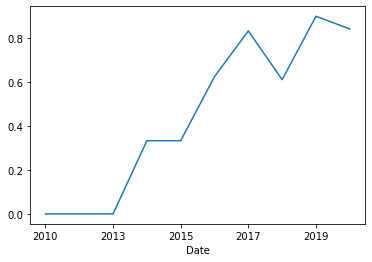

In [11]:
year=[]
year = Extract_year(df)
df1 = df.copy()
df1['Date'] = year
df1.groupby('Date')['Class'].mean().plot()

We can observe here that in the early phase (2010-2013), the success rate is 0%. This is probably because the engineers are still on the learning process of building the rocketships. However, it can be observed that the sucess rate since 2013 has an increasing trend until 2020.


### Visualizing the success rate of the landing pad.

<AxesSubplot:xlabel='LandingPad'>

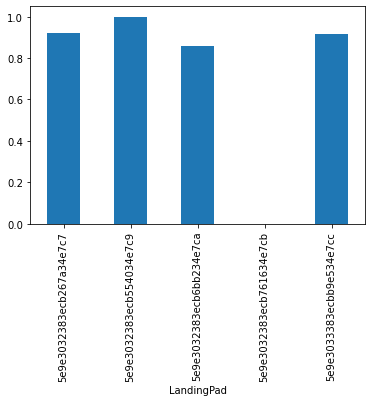

In [12]:
df.groupby('LandingPad')['Class'].mean().plot.bar()

We can observe here that 4 out of 5 landing pads yield a successful launch. However, it's a bit non-related since we know that the launch is not related to the landing

## Features Engineering


By now, we have some insights on the variable which can affect the outcome of the launch.

In [13]:
#features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'LandingPad']]
features

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,LandingPad
0,1,6123.547647,LEO,CCSFS SLC 40,1,NaN
1,2,525.000000,LEO,CCSFS SLC 40,1,NaN
2,3,677.000000,ISS,CCSFS SLC 40,1,NaN
3,4,500.000000,PO,VAFB SLC 4E,1,NaN
4,5,3170.000000,GTO,CCSFS SLC 40,1,NaN
...,...,...,...,...,...,...
85,86,15600.000000,VLEO,KSC LC 39A,2,5e9e3032383ecb6bb234e7ca
86,87,15600.000000,VLEO,KSC LC 39A,3,5e9e3032383ecb6bb234e7ca
87,88,15600.000000,VLEO,KSC LC 39A,6,5e9e3032383ecb6bb234e7ca
88,89,15600.000000,VLEO,CCSFS SLC 40,3,5e9e3033383ecbb9e534e7cc


### Creating dummy variables to categorical columns


Apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code> and <code>LandingPad</code>.

In [14]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6123.547647,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,525.000000,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,677.000000,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,500.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,3170.000000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [15]:
features_one_hot.astype(float)


,FlightNumber,PayloadMass,Flights,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1.0,6123.547647,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
86,87.0,15600.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
87,88.0,15600.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
88,89.0,15600.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now save the data frame to a csv file which can be used in the next step.

In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)